# Projet Optimisation : Reconnaissance d’hyperquadriques 

Groupe : ISI A                              
- Bekdouche Lina Insaf
- Lucas Garnier



### But du projet :
Déterminer la meilleure HQ passant par un nuage de points.

Une hyperquadrique (HQ) est une fonction définie par :  $ \Psi(x,y,\lambda) = \Sigma |A_kx+B_ky+C_k|^{\lambda_k}  \\ $
La somme va de 1 à Nh avec Nh est le nombre de termes de l'hyperquadrique HQ. 

Et $ \lambda=(A_k,B_k,C_k,\gamma_k,\forall K=1,Nh) $ est le vecteur de parametre de HQ, avec $\gamma_k \geq 0$

L’équation implicite:   $ \Psi(x,y,\lambda) = \phi(x,y,\lambda) -1 =0  \\ $ définit le contour fermé qui nous intéresse.



In [1]:
# Importation des bibliothèques
import numpy as np
import math 
import matplotlib.pyplot as plt
import csv
import pandas as pd 
import array
from numpy.linalg import inv
pd.set_option('display.max_columns', 100)

In [2]:
#import des data (nos données x et y)
df=pd.read_csv("Data_HQ_Ph1et2.csv",header=None); df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.275510,0.581633,0.214286,0.214286,-0.459184,-0.765306,-0.948980,-0.948980,-1.010204,-0.214286,-0.704082,-1.010204,-0.275510,-0.397959,-0.214286,-0.887755,0.948980,0.642857,0.826531,0.948980,0.030612,0.948980,0.765306
1,0.765306,0.397959,0.826531,0.765306,1.316327,0.887755,0.030612,0.704082,0.275510,1.132653,1.132653,0.520408,-0.765306,-0.581633,-0.765306,-0.030612,-0.704082,-1.193878,-0.948980,-0.520408,-1.010204,-0.214286,-1.010204


## Phase 1 : Visualiser une HQ de paramètres donnés

Afin de visualiser une HQ,le plus simple est de tracer l’isovaleur de niveau 0 de la fonction  𝜓(𝑥,𝑦,𝜆)

Donc, on va avoir besoin d’écrire une fonction qui calcule 𝜓(𝑥,𝑦,𝜆)

Il faut aussi déterminer les droites englobantes. NB : 1 droite est définie par 2 points.

Le domaine de tracé est choisi par l’utilisateur 

In [3]:
#calcul de la fonction 𝜓 de HQ:
def HQ_def(lambdas,x,y):
    phi=[]
    for i in range (len(lambdas)):
        phi.append((abs(lambdas[i][0]*x+lambdas[i][1]*y+lambdas[i][2]))**lambdas[i][3])
    return sum(phi)

In [4]:
#Tracer des isovaleurs de 𝜓 ainsi que les droites englobantes: 
def HQ_trace(lambdas,x,y):
    plt.figure(figsize=(5,5))
    niso=20
    # Discrétisation du domaine de tracé
    x1d = np.linspace(-1.5,1.5,niso)
    y1d = np.linspace(-1.5,1.5,niso)
    x2d, y2d = np.meshgrid(x1d, y1d)
    # Tracé de l'isovaleurs de phi-1:
    plt.contour(x2d,y2d,HQ_def(lambdas,x2d,y2d)-1,0,colors='black')
    # Tracé des droites englobantes :
    for i in range(len(lambdas)):
        print('a,b,c= ',lambdas[i][0],'/',lambdas[i][1],'/',lambdas[i][2],'- gamma= ',lambdas[i][3])
        if (lambdas[i][1])==0:
            xmin=-(1+lambdas[i][2])/lambdas[i][0]
            xmax=(1-lambdas[i][2])/lambdas[i][0]
            plt.axvline(x=xmin)
            plt.axvline(x=xmax)
        else :
            ymin=-(lambdas[i][0]/lambdas[i][1])*x1d-(lambdas[i][2]+1)/(lambdas[i][1])
            ymax=-(lambdas[i][0]/lambdas[i][1])*x1d-(lambdas[i][2]-1)/(lambdas[i][1])
            plt.plot(x1d,ymin,x1d,ymax)
    #Tracé du nuages de points
    plt.title('Hyper-quadrique avec '+str(len(lambdas))+' termes')
    plt.xlabel('Coordonnée x')
    plt.ylabel('Coordonnée y')
    plt.grid()
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)

a,b,c=  1 / 0 / 0 - gamma=  2
a,b,c=  0 / 1 / 0 - gamma=  2


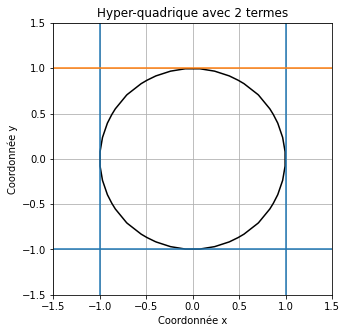

In [5]:
x=df.loc[0].values
y=df.loc[1].values

lambdas1=[[1,0,0,2],[0,1,0,2]]
HQ_trace(lambdas1,x,y)

a,b,c=  1 / 0 / 0 - gamma=  5
a,b,c=  0 / 1 / 0 - gamma=  5
a,b,c=  0.7 / -0.7 / 0 - gamma=  5


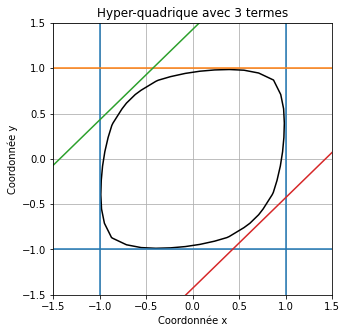

In [6]:
lambdas2=[[1,0,0,5],[0,1,0,5],[0.7,-0.7,0,5]]
HQ_trace(lambdas2,x,y)

a,b,c=  1 / 0 / 0 - gamma=  5
a,b,c=  0 / 1 / 0 - gamma=  5
a,b,c=  0.6 / -0.6 / 0 - gamma=  5
a,b,c=  0.6 / 0.6 / 0 - gamma=  5


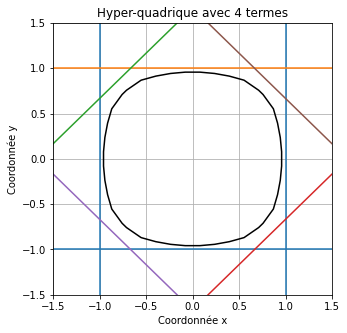

In [7]:
lambdas3=[[1,0,0,5],[0,1,0,5],[0.6,-0.6,0,5],[0.6,0.6,0,5]]
HQ_trace(lambdas3,x,y)

a,b,c=  0.733 / -0.416 / 0 - gamma=  4
a,b,c=  1 / 1 / 0 - gamma=  4


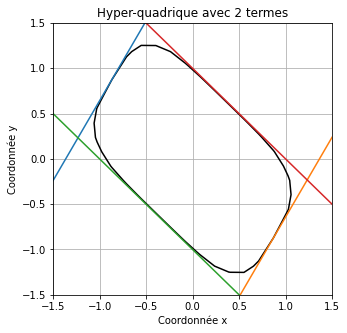

In [8]:
lambdas4=[[0.733,-0.416,0,4],[1,1,0,4]]
HQ_trace(lambdas4,x,y)

Commentaire :

Pour chaque lambdas[i] on a 2 droites englobantes, qui viennent des equations : 

$ \frac{-A_k}{B_k}x-\frac{C_k}{B_k}-\frac{1}{B_k} \leq y \leq \frac{-A_k}{B_k}x-\frac{C_k}{B_k}+\frac{1}{B_k} \\
   \frac{-C_k}{A_k}-\frac{1}{A_k} \leq x \leq \frac{-C_k}{A_k}+\frac{1}{A_k} \\ $
   

## Phase 2 : Prendre en main les méthodes de minimisation qui vont permettre de déterminer la meilleurs HQ : 
 
Le problème considéré est un cas particulier du problème général, avec $N_h$ = 2. De plus, 6 des 8 paramètres sont
connus. L’HQ est définie par l’équation ci-dessous, dans laquelle il n’y a que deux paramètres : 𝑎 et 𝑏. 

$ \Psi(x,y,a,b) = (ax+by)^4+(x+y)^4-1 \\ $

Les données à fitter sont un ensemble de points ${[x_i,y_i]}$. Le but du problème est de trouver le jeu de coefficients $𝑎$ et $𝑏$ tels que l’hyperquadrique passe au mieux par le nuage de points. Pour cela, il faut définir un critère de distance entre un point et l’hyperquadrique HQ, dont on déduit un critère de distance entre l’ensemble des points et HQ. On propose de travailler avec le critère quadratique ci-dessous. 

$ J(a,b) = \Sigma[\Psi(x_i,y_i,a,b)]^2 \\ $

Et donc on a : 

$ J(a,b) = \Sigma[(ax_i+by_i)^4+(x_i+y_i)^4-1]^2 \\ $

Deux méthodes seront implémentées et testées : une descente de gradient à pas fixe, puis la méthode de Newton. 
Pour cela on aura besoin de calculer le gradient de J et sa matrice hessienne : $\bigtriangledown J(a,b)$ et $H_J(a,b)$

- Calcule du gradient de J(a,b):

$\boldsymbol{\bigtriangledown J(a,b)} \implies
\left\{
  \begin{array}{lr}
    \frac{\partial J(a,b)}{\partial a} = 8x(ax_i+by_i)^3((ax_i+by_i)^4+(x_i+y_i)^4-1) \\
    \frac{\partial J(a,b)}{\partial b} = 8y(ax_i+by_i)^3((ax_i+by_i)^4+(x_i+y_i)^4-1) \\
  \end{array}
\right.$

- Calcule de la matrice hessienne de J(a,b):

$\boldsymbol{H_J(a,b)} \implies
\left\{
  \begin{array}{lr}
    \frac{\partial^2 J(a,b)}{\partial a\partial a} =32x^2(ax+by)^6+24x^2(ax+by)^2((ax+by)^4+(x+y)^4-1)  \\
    \frac{\partial^2 J(a,b)}{\partial a\partial b} =32xy(ax+by)^6+24xy(ax+by)^2((ax+by)^4+(x+y)^4-1) \\
    \frac{\partial^2 J(a,b)}{\partial b\partial a} =32xy(ax+by)^6+24xy(ax+by)^2((ax+by)^4+(x+y)^4-1)  \\
    \frac{\partial^2 J(a,b)}{\partial b\partial b} =32y^2(ax+by)^6+24y^2(ax+by)^2((ax+by)^4+(x+y)^4-1))\\
  \end{array}
\right.$



In [7]:
# Definition de HQ du problème simplifié
def phi_2(x0):
    p2=[]
    for i in range(len(x)):
        p2.append((x0[0]*x[i]+x0[1]*y[i])**4+(x[i]+y[i])**4-1)  
    return p2

In [8]:
#Definition du critère quadratique J:
def J(x0):
    j=[]
    for i in range(len(x)):
        j.append(((x0[0]*x[i]+x0[1]*y[i])**4+(x[i]+y[i])**4-1)**2)  
    return sum(j)

In [9]:
#Definition du gradient de J:
def J_D(x0):
    dj_da=[]
    dj_db=[]
    for i in range(len(x)):
    # Dérivée partielle par rapport à x
        dj_da.append(8*x[i]*(x[i]*x0[0]+y[i]*x0[1])**3*((x[i]*x0[0]+y[i]*x0[1])**4+(x[i]+y[i])**4-1))
        # Dérivée partielle par rapport à y
        dj_db.append(8*y[i]*(y[i]*x0[1]+x[i]*x0[0])**3*((x[i]*x0[0]+y[i]*x0[1])**4+(x[i]+y[i])**4-1))
    return [sum(dj_da),sum(dj_db)]

In [10]:
#Definition de la matrice hessienne de J :
def J_D2(x0):
    d2j_dada=[]
    d2j_dadb=[]
    d2j_dbda=[]
    d2j_dbdb=[]
    for i in range(len(x)):  
        d2j_dada.append(32*x[i]**2*(x0[0]*x[i]+y[i]*x0[1])**6+24*x[i]**2*(x0[0]*x[i]+y[i]*x0[1])**2*((x0[0]*x[i]+y[i]*x0[1])**4+(x[i]+y[i])**4-1))
        d2j_dadb.append(32*y[i]*x[i]*(x0[0]*x[i]+y[i]*x0[1])**6+24*y[i]*x[i]*(x0[0]*x[i]+y[i]*x0[1])**2*((x0[0]*x[i]+y[i]*x0[1])**4+(x[i]+y[i])**4-1))
        d2j_dbda.append(32*y[i]*x[i]*(x0[0]*x[i]+y[i]*x0[1])**6+24*y[i]*x[i]*(x0[0]*x[i]+y[i]*x0[1])**2*((x0[0]*x[i]+y[i]*x0[1])**4+(x[i]+y[i])**4-1))
        d2j_dbdb.append(32*y[i]**2*(x0[0]*x[i]+y[i]*x0[1])**6+24*y[i]**2*(x0[0]*x[i]+y[i]*x0[1])**2*((x0[0]*x[i]+y[i]*x0[1])**4+(x[i]+y[i])**4-1))
    return [[sum(d2j_dada),sum(d2j_dadb)],[sum(d2j_dbda),sum(d2j_dbdb)]]

In [11]:
#calcule de la norme du gradient J:
def J_norme(x0):
    z,t=J_D(x0)
    return np.sqrt(z**2+t**2)

### Implementation de la méthode descente de gradient :

La méthode de descente de gradient consiste a minimiser J dans la direction de la plus grande pente, au lieu de minimiser arbitrairement dans la direction des axes du repère, on cherche au point actuel, la direction dans laquelle la fonction descend le plus rapidement.

A partir du point $\tilde{x_n}$, on calcul $\tilde{x_{n+1}}$ en résolvant le problème qui suit 

$ 
\left\{
  \begin{array}{lr}
    \ Trouver\ : x_{n+1}\ qui\ minimise\ la\ fonction \\
    \ avec\ : x_{n+1}\ dans\ D[\tilde{ x}\ , \boldsymbol{\bigtriangledown f(\tilde{x_n})]} \\
  \end{array}
\right.
$

Ou $ D[\tilde{ x}\ , \boldsymbol{\bigtriangledown f(\tilde{x_n})]} $ est la droite passant par $\tilde x_n $ et de vecteur directeur $\boldsymbol{\bigtriangledown f(\tilde{x_n})} $

$ X_n = X_{n-1} -\alpha \bigtriangledown J(X_{n-1})   $

La méthode dite « à pas fixe » consiste à prendre une valeur de 𝛼 constante. On note que le déplacement à chaque
itération est proportionnel au module du gradient. La longueur du déplacement se réduit donc automatiquement
au voisinage du minimum, assurant la convergence. Le problème est de choisir une valeur de 𝛼 qui garantisse à la
fois la convergence et l’efficacité de l’algorithme. En pratique, cette recherche est empirique (essai-erreur), à moins que l’on dispose d’informations sur la concavité de la fonction.

On va implémenter la méthode descente de gradient afin de déterminer les coefficients 𝑎 et 𝑏 qui minimisent le critère de distance 𝐽(𝑎, 𝑏)

Les isovaleurs de 𝐽 seront tracées dans le plan (𝑎, 𝑏), avec -1 < 𝑎 < 1. et -1 < 𝑏 < 1, de même que la suite de points intermédiaires $(𝑎_n, 𝑏_n)$.

Le programme indique si la recherche de minimum a convergé, le nombre d’itérations réalisées et le dernier point obtenu (voir exemple de sortie en bas de page).
L’hyperquadrique ainsi obtenue sera alors superposée au nuage de points pour vérifier le résultat.

Les méthodes seront appliquées avec un critère d’arrêt 𝜀$ <10^6 $.

In [12]:
#Definition de la methode descente de gradient :
def grad_fixe(x0,alpha,eps,nmax):
    plt.figure(figsize=(10,10))
    xn=x0
    dx=1
    n=0
    converge=False
    while (abs(dx)>eps and n<nmax) :
        j=np.array(J_D(xn))
        xn=[xn[0]-alpha*j[0],xn[1]-alpha*j[1]]
        plt.plot(xn[0],xn[1],'*')
        dx=abs(alpha*J_norme(xn))
        #print(xn)
        n=n+1
        if(dx<eps):
            converge=True
            break
    print('Recherche de a et de b par descente de gradient :')
    print('=================================================')
    print('Point initial : [a_ini,b_ini]= ',x0)
    print('Point final : [a_fin,b_fin]= ',xn)
    print('Nombres diterations =',n)
    print('Valeur finale du critére = ',J(xn))
    print('Eps= ',dx)
    print('Convergence= ',converge)
    #tracé:
    nIso = 1000
    # Définition du domaine de tracé
    amin, amax, na = -1, 1, nIso
    bmin, bmax, nb = -1, 1, nIso
    # Discrétisation du domaine de tracé
    x1d = np.linspace(amin,amax,na)
    y1d = np.linspace(bmin,bmax,nb)
    x2d, y2d = np.meshgrid(x1d, y1d)
    # Tracé des isovaleurs de f1
    plt.contour(x2d,y2d,J([x2d,y2d]),nIso,cmap='rainbow')
    plt.title('Isovaleurs')
    plt.xlabel('Valeurs de a')
    plt.ylabel('Valeurs de b')
    plt.grid()
    plt.axis('square')

Recherche de a et de b par descente de gradient :
Point initial : [a_ini,b_ini]=  [0, -0.25]
Point final : [a_fin,b_fin]=  [0.7904440880004747, -0.3868538261489983]
Nombres diterations = 50
Valeur finale du critére =  0.30103805269260653
Eps=  0.0024581706396603034
Convergence=  False


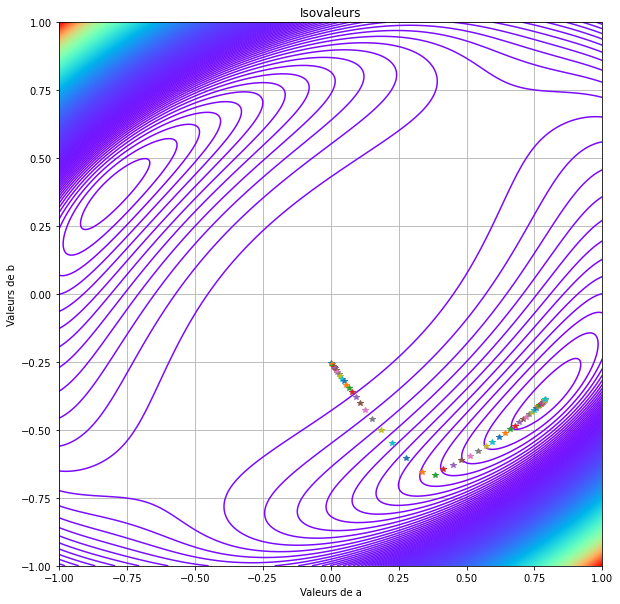

In [15]:
x0=[0,-0.25]
alpha=0.004
eps=0.000001
nmax=50
grad_fixe(x0,alpha,eps,nmax)

Recherche de a et de b par descente de gradient :
Point initial : [a_ini,b_ini]=  [0, 0.25]
Point final : [a_fin,b_fin]=  [-0.7904440880004747, 0.3868538261489983]
Nombres diterations = 50
Valeur finale du critére =  0.30103805269260653
Eps=  0.0024581706396603034
Convergence=  False


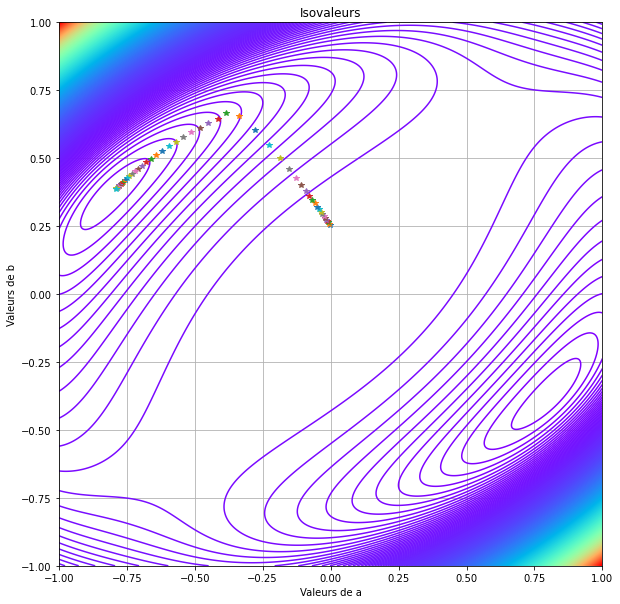

In [17]:
#On va choisir un deuxiéme point de depart pou trouver une autre solution:
x1=[0,0.25]
grad_fixe(x1,alpha,eps,nmax)

a,b,c=  0.7288375399503374 / -0.44360554090375487 / 0 - gamma=  4
a,b,c=  1 / 1 / 0 - gamma=  4
a,b,c=  -0.7288375399503374 / 0.44360554090375487 / 0 - gamma=  4
a,b,c=  1 / 1 / 0 - gamma=  4


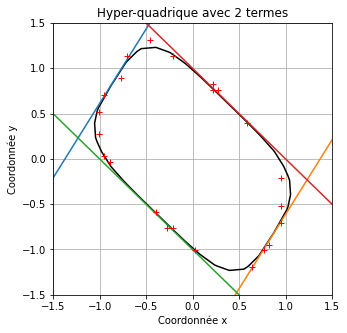

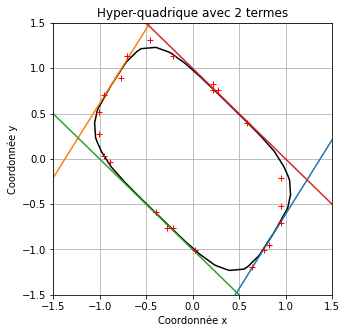

In [18]:
#On peut tracé notre contour avec les deux parametres solutions trouvés avec le nuage de points :

lambdas_sol1_grad=[[0.7288375399503374, -0.44360554090375487,0,4],[1, 1,0,4]]
lambdas_sol2_grad=[[-0.7288375399503374, 0.44360554090375487,0,4],[1, 1,0,4]]
HQ_trace(lambdas_sol1_grad,x,y)
plt.plot(x,y,'r+')
HQ_trace(lambdas_sol2_grad,x,y)
plt.plot(x,y,'r+')


Commentaires : 
- L'importance du point de départ est moindre dans la méthode de descente de gradient
- Alpha doit etre assez petit pour que la convergence aie lieu, par exemple avec un alpha de 0.1 la fonction diverge de la valeur finale, mais alpha ne doit pas etre trop petit non plus, on constate qu'a partir de 0.004, la fonction n'atteind plus la valeur finale.
- Cependant, le temps de calcul de la fonction est assez important.
- La solution (𝑎, 𝑏) n’est pas unique et dépend du point initial de l’algorithme. 

### Implementation de la méthode descente de Newton :

La méthode de Newton est, selon le cours, potentiellement plus puissante que celle vu précedemment, car elle utilise plus d'information sur la fonction que la méthode de descente de gradient. Cependant, elle n'est pas toujours facile à mettre en place.

Au point $\tilde{x_n}$, on apprixime la fonction apres son développpement de Taylor a l'ordre 2 et on cherche ensuite le minimum de cette approximation. Le problème à résoudre est donc la minimisation de :

$
\tilde{f_n}(x) = f(\tilde{x*_n}) + \boldsymbol \bigtriangledown f(\tilde{x*_n})^T . (x- \tilde{x*_n}) + 1/2(x - \tilde{x*_n})^T Hf(\tilde{x*_n})(x- \tilde{x*_n})
$


Ce problème admet une solution $\tilde{x*_n+1}$ si $Hf(\tilde{x*_n})$ est définie positive, et celtte solution est donnée par $\boldsymbol \bigtriangledown f(\tilde{x*_n+1}) = 0 $

On utilise donc la fonction J calculé précedemment.

On va implémenter la méthode de Newton afin de déterminer les coefficients 𝑎 et 𝑏 qui minimisent le critère de distance 𝐽(𝑎, 𝑏)

Les isovaleurs de 𝐽 seront tracées dans le plan (𝑎, 𝑏), avec -1 < 𝑎 < 1. et -1 < 𝑏 < 1, de même que la suite de points intermédiaires $(𝑎_n, 𝑏_n)$.

Le programme indique si la recherche de minimum a convergé, le nombre d’itérations réalisées et le dernier point obtenu (voir exemple de sortie en bas de page).

L’hyperquadrique ainsi obtenue sera alors superposée au nuage de points pour vérifier le résultat.

Les méthodes seront appliquées avec un critère d’arrêt 𝜀$ <10^6 $.

In [13]:
#Definition de la methode de Newton :
def newton(x0,eps,nmax):
    plt.figure(figsize=(10,10))
    xn=x0
    dx=1
    n=0
    converge='False'  
    while (dx>eps and n<nmax) :
        plt.plot(xn[0],xn[1],'*')
        j=np.array(J_D(xn))
        j2=np.array(J_D2(xn))
        xd=inv(j2).dot(-j)
        xn=[xn[0]+xd[0],xn[1]+xd[1]]
        dx=abs(np.sqrt(xd[0]**2+xd[1]**2)) 
        n=n+1     
        if(dx<eps):
            converge='True'
    print('Recherche de a et de b par méthode de Newton :')
    print('=================================================')
    print('Point initial : [a_ini,b_ini]= ',x0)
    print('Point final : [a_fin,b_fin]= ',xn)
    print('Nombres diterations =',n)
    print('Valeur finale du critére = ',J(xn))
    print('Eps= ',dx)
    print('Convergence= ',converge)
    #tracé:
    nIso = 1000
    # Définition du domaine de tracé
    amin, amax, na = -1, 1, nIso
    bmin, bmax, nb = -1, 1, nIso
    # Discrétisation du domaine de tracé
    x1d = np.linspace(amin,amax,na)
    y1d = np.linspace(bmin,bmax,nb)
    x2d, y2d = np.meshgrid(x1d, y1d)
    # Tracé des isovaleurs de f1
    plt.contour(x2d,y2d,J([x2d,y2d]),nIso,cmap='rainbow')
    plt.title('Isovaleurs')
    plt.xlabel('Valeurs de a')
    plt.ylabel('Valeurs de b')
    plt.grid()
    plt.axis('square')

Recherche de a et de b par méthode de Newton :
Point initial : [a_ini,b_ini]=  [1, -1]
Point final : [a_fin,b_fin]=  [0.8034599754706138, -0.37371175148140323]
Nombres diterations = 9
Valeur finale du critére =  0.2953396398076217
Eps=  9.240294617299274e-08
Convergence=  True


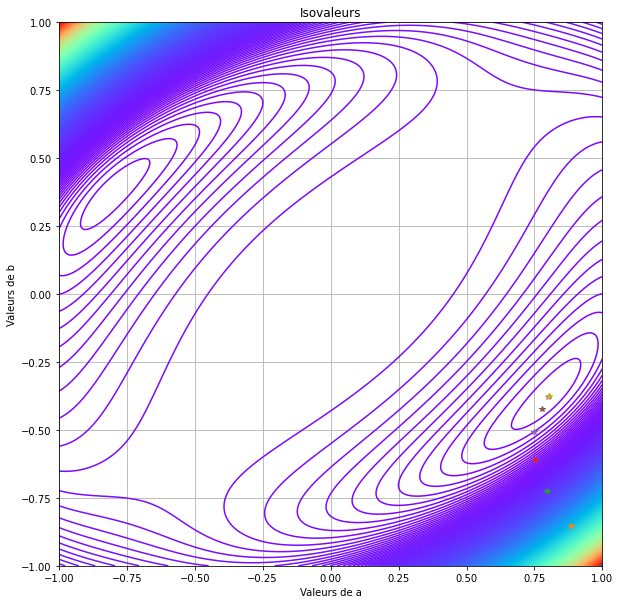

In [20]:
x0=[1, -1]
eps=0.000001
nmax=20
newton(x0,eps,nmax)

Recherche de a et de b par méthode de Newton :
Point initial : [a_ini,b_ini]=  [-1, 1]
Point final : [a_fin,b_fin]=  [-0.8034599754706138, 0.37371175148140323]
Nombres diterations = 9
Valeur finale du critére =  0.2953396398076217
Eps=  9.240294617299274e-08
Convergence=  True


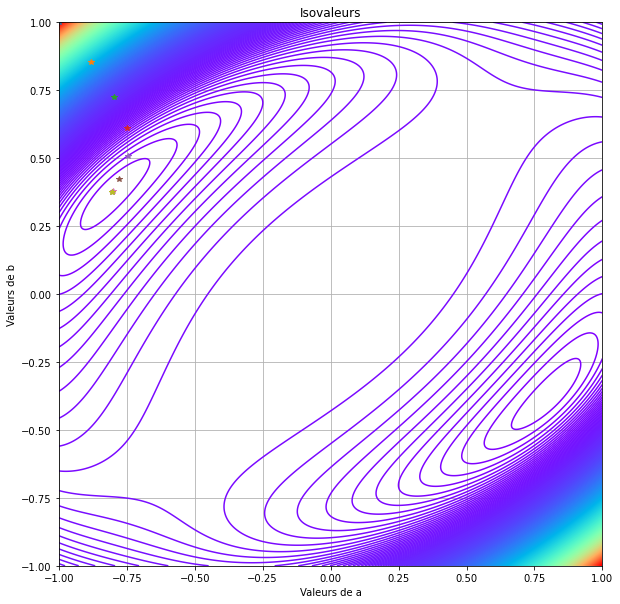

In [21]:
x1=[-1, 1]
newton(x1,eps,nmax)

a,b,c=  0.8034599754706138 / -0.37371175148140323 / 0 - gamma=  4
a,b,c=  1 / 1 / 0 - gamma=  4
a,b,c=  -0.8034599754706138 / 0.37371175148140323 / 0 - gamma=  4
a,b,c=  1 / 1 / 0 - gamma=  4


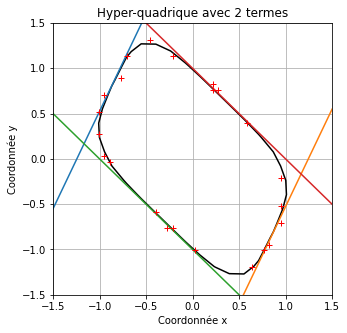

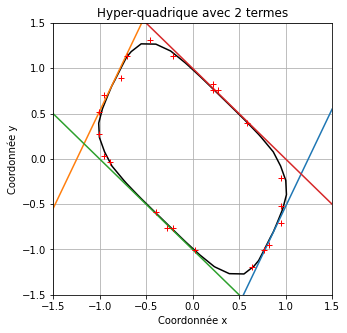

In [199]:
#On peut tracé notre contour avec les deux parametres solutions trouvés :

lambdas_sol1_newton=[[0.8034599754706138, -0.37371175148140323,0,4],[1, 1,0,4]]
lambdas_sol2_newton=[[-0.8034599754706138, 0.37371175148140323,0,4],[1, 1,0,4]]
HQ_trace(lambdas_sol1_newton,x,y)
plt.plot(x,y,'r+')
HQ_trace(lambdas_sol2_newton,x,y)
plt.plot(x,y,'r+')

Commentaires :  
- Faut bien choisir point de depart sinon l'algorithme converge pas contrairement à la methode de gradient. ici on a du se rapproché de la solution.
- La méthode de Newton converge plus rapidement que la méthode de descente du gradient, mais elle est plus copmpliquée à mettre en place.
- Il était nécessaire de faire quelques ajustements du point de depart pour éviter que l'algorithme « partent dans les décors ».
- La solution (𝑎, 𝑏) n’est pas unique et dépend du point initial de l’algorithme. 

# Implementation de la méthode de Levenberg-Marquart (phase 3)

La méthode de Leverberg-Marquat est une méthode qui repose en grande partie sur l'utilisation de la méthode de descente de gradient, ainsi que celle de Newton. Cette méthode permet de trouver une solution peu importe le point de départ de l'algorithme. Cependant comme la plupart des algorithmes que nous avons vu, cette méthode permet de trouver un minium local, qui n'est pas forcement le minimum global.

C'est une méthode qui, à chaque ittération définie une nouvelle "zone de confiance", c'est a dire une zone dans laqelle les dérivées ne varient pas, l'algorithme ajuste la zone de confiance a chaque ittération, s'il detecte que la solution a tendance a se dégrader lorsque que la zone de recherche considérée est trop grand, alors il diminue la taille de cette dernière, s'il juge que la zone de confiance est trop petite pour atteindre une convergence rapide vers le minimum, alors il étendra celle ci.
L'algorithme de la méthode commence avec un comportment similaire a la méthode de descente du grardient, et au voisinage de la solution il adopte un comportement proche de la méthode de Newuton grace au terme $\beta $ qui sert à a ponderer la matrice Hessienne, ainsi que gérer la taille de la zone de confiance, afin de passer d'un comportement a l'autre
En effet, lorsque $\beta$ est grand ( $\simeq$ 1), alors la méthode fonctionne comme une descente de gradient, et inversement lorsque $\beta$ est petit ( $\simeq$ 0.001) alors la méthode adopte un fonctionnement proche de celui de la méthode de Newton.

Le comportement attendu de $\beta$ est d'être croissant au debut, ce qui correspond a une approche similaire a la méthode du gradient, jusqu'à trouver une zone de confiance suffisement proche du minimum. $\beta$ décroit ensuite rapidement lorsque le resultat de l'algorithme se rapproche de la solution, pour adopter un comportement similaire a la méthode e Newton.

  
Soit : 
$ \ f(x) = \frac{1}{2}\Sigma_{i=1}^{N}r_i(x)^2 $, une fonction, avec  

$\ x = (x_j)_{j=1,m} = \begin{pmatrix}
x_1\\
...\\
x_m
\end{pmatrix} $ 

Son gradient vaut alors 

$ \boldsymbol{\bigtriangledown f(x)= }$
$ \Sigma_{i=1}^{N} \frac{\partial r_i(x)}{\partial x_j}.r_i(x))_{j=1,m} = 
  \begin{pmatrix} 
    \Sigma_{i=1}^{N} \frac{\partial r_i(x)}{\partial x_1}.r_i(x)\\
    \Sigma_{i=1}^{N} \frac{\partial r_i(x)}{\partial x_j}.r_i(x) \\
  \end{pmatrix} $

 Dans notre cas,
 
 $ x= (x_j) = \lambda = \begin{bmatrix} A_k \\ B_k \\ C_k \end{bmatrix}$
 
 Ce qui nous donne :
 
 $ \boldsymbol{\bigtriangledown f(\lambda)=}$
 $ \begin{pmatrix} 
     \Sigma_{i=1}^{N} \frac{\partial r_i}{\partial A_k}(\lambda).r_i(\lambda)\\
     \Sigma_{i=1}^{N} \frac{\partial r_i}{\partial B_k}(\lambda).r_i(\lambda)\\
     \Sigma_{i=1}^{N} \frac{\partial r_i}{\partial C_k}(\lambda).r_i(\lambda)\\
   \end{pmatrix} 
 = \begin{pmatrix}  \frac{\partial f(\lambda)}{\partial A_k}\\
      \frac{\partial f(\lambda)}{\partial B_k}\\
       \frac{\partial f(\lambda)}{\partial C_k}\\
   \end{pmatrix} $

$H_f(\lambda) = \begin{pmatrix}
\frac{\partial^2 f(\lambda)}{\partial^2 A_k} & \frac{\partial^2 f(\lambda)}{\partial A_k \partial B_k} & \frac{\partial^2 f(\lambda)}{\partial A_k \partial C_k}\\
\frac{\partial^2 f(\lambda)}{\partial B_k \partial A_k} & \frac{\partial^2 f(\lambda)}{\partial^2 B_k} & \frac{\partial^2 f(\lambda)}{\partial B_k \partial C_k}\\
\frac{\partial^2 f(\lambda)}{\partial C_k \partial A_k} & \frac{\partial^2 f(\lambda)}{\partial C_k \partial B_k} & \frac{\partial^2 f(\lambda)}{\partial^2 C_k}\\
\end{pmatrix}
 \simeq 
\begin{pmatrix}
\Sigma _{i=1}^N\frac{\partial^2 r_i}{\partial^2 A_k}(\lambda) & \Sigma _{i=1}^N\frac{\partial r_i}{\partial A_k \partial B_k}(\lambda) & \Sigma _{i=1}^N\frac{\partial r_i} {\partial A_k \partial C_k} (\lambda)\\
\Sigma _{i=1}^N\frac{\partial r_i}{\partial B_k \partial A_k}(\lambda) & \Sigma _{i=1}^N\frac{\partial^2 r_i}{\partial^2 B_k}(\lambda) & \Sigma _{i=1}^N\frac{\partial r_i}{\partial B_k \partial C_k}(\lambda)\\
\Sigma _{i=1}^N\frac{\partial r_i}{\partial C_k \partial A_k}(\lambda) & \Sigma _{i=1}^N\frac{\partial r_i}{\partial C_k \partial B_k}(\lambda) & \Sigma _{i=1}^N\frac{\partial^2 r_i}{\partial^2 C_k}(\lambda)\\
\end{pmatrix}
 $



 
 On a ici :  $ \ J(\lambda) = \frac{1}{2}\Sigma_{i=1}^{N} (1-F_{io}(x_i,y,i,\lambda))^2 + v.\Sigma_{k=1}^{N_h}P_k(\lambda) $

  $ \boldsymbol{\bigtriangledown f(\lambda)} =  \begin{pmatrix} 
\Sigma_{i=1}^{N} \frac{\partial [1-F_{io}(x_i,y_i,\lambda)]}{\partial A_k}.[1-F_{io}(x_i,y_i,\lambda)] +  v.\Sigma_{k=1}^{N_h}\frac{\partial P_k(\lambda)}{\partial A_k}\\
\Sigma_{i=1}^{N} \frac{\partial [1-F_{io}(x_i,y_i,\lambda)]}{\partial B_k}.[1-F_{io}(x_i,y_i,\lambda)] +  v.\Sigma_{k=1}^{N_h}\frac{\partial P_k(\lambda)}{\partial C_k}\\
\Sigma_{i=1}^{N} \frac{\partial [1-F_{io}(x_i,y_i,\lambda)]}{\partial C_k}.[1-F_{io}(x_i,y_i,\lambda)] +  v.\Sigma_{k=1}^{N_h}\frac{\partial P_k(\lambda)}{\partial C_k}\\
\end{pmatrix}
$


avec : 


$\frac{\partial [1-F_{io}(x_i,y_i,\lambda)]}{\partial A_k} = -\frac{\partial}{\partial A_k}(\Sigma_i^{N_h} |A_kx_i+B_ky_i+C_k|^4)^{\frac{1}{4}}\\
= -{\frac{1}{4}} (\Sigma_{k=1}^{N_h} |A_kx_i+B_ky_i+C_k|^4)^{\frac{1}{4}-1} . \frac{\partial}{\partial A_k} \Sigma_{k=1}^{N_h} |A_kx_i+B_ky_i+C_k|^4
= -{\frac{1}{4}} (\Sigma_{k=1}^{N_h} |A_kx_i+B_ky_i+C_k|^4)^{\frac{1}{4}-1} . \Sigma_{k=1}^{N_h}\frac{\partial}{\partial A_k} |A_kx_i+B_ky_i+C_k|^4
= -{\frac{1}{4}} (\Sigma_{k=1}^{N_h} |A_kx_i+B_ky_i+C_k|^4)^{\frac{1}{4}-1} . \Sigma_{k=1}^{N_h} 4 |A_kx_i+B_ky_i+C_k|^3x
\\
$


De la même façon : 


$
\frac{\partial [1-F_{io}(x_i,y_i,\lambda)]}{\partial B_k} = -{\frac{1}{4}} (\Sigma_{k=1}^{N_h} |A_kx_i+B_ky_i+C_k|^4)^{\frac{1}{4}-1} . \Sigma_{k=1}^{N_h} 4 |A_kx_i+B_ky_i+C_k|^3y\\ 
$



Et 

$
\frac{\partial [1-F_{io}(x_i,y_i,\lambda)]}{\partial C_k} = -{\frac{1}{4}} (\Sigma_{k=1}^{N_h} |A_kx_i+B_ky_i+C_k|^4)^{\frac{1}{4}-1} . \Sigma_{k=1}^{N_h} 4 |A_kx_i+B_ky_i+C_k|^3
$




In [14]:
def Fio(x,y,lambdas):
    io = HQ_def(lambdas,x,y)**(1/4)  
    return io

In [15]:
#Tracer des isovaleurs de 𝜓 ainsi que les droites englobantes: 
def fio_trace(lambdas,x,y):
    plt.figure(figsize=(5,5))
    niso=200
    # Discrétisation du domaine de tracé
    x1d = np.linspace(-50,250,niso)
    y1d = np.linspace(-50,250,niso)
    x2d, y2d = np.meshgrid(x1d, y1d)
    # Tracé de l'isovaleurs de phi-1:
    plt.contour(x2d,y2d,1-Fio(x2d,y2d,lambdas),0,colors='black')
    # Tracé des droites englobantes :
    for i in range(len(lambdas)):
        print('a,b,c= ',lambdas[i][0],'/',lambdas[i][1],'/',lambdas[i][2],'- gamma= ',lambdas[i][3])
        if (lambdas[i][1])==0:
            xmin=-(1+lambdas[i][2])/lambdas[i][0]
            xmax=(1-lambdas[i][2])/lambdas[i][0]
            plt.axvline(x=xmin)
            plt.axvline(x=xmax)
        else :
            ymin=-(lambdas[i][0]/lambdas[i][1])*x1d-(lambdas[i][2]+1)/(lambdas[i][1])
            ymax=-(lambdas[i][0]/lambdas[i][1])*x1d-(lambdas[i][2]-1)/(lambdas[i][1])
            plt.plot(x1d,ymin,x1d,ymax)
    #Tracé du nuages de points
    plt.title('Hyper-quadrique avec '+str(len(lambdas))+' termes')
    plt.xlabel('Coordonnée x')
    plt.ylabel('Coordonnée y')
    plt.grid()
    plt.ylim(-50, 250)

In [16]:
def dfio(x,y,lambdas):
    dfio_dx=[]
    dfio_dy=[]
    for i in range(len(lambdas)):
        # Dérivée partielle par rapport à x
        dfio_dx.append(lambdas[i][0]*(abs(lambdas[i][0]*x +lambdas[i][1]*y +lambdas[i][2])**3)*(abs(lambdas[i][0]*x +lambdas[i][1]*y +lambdas[i][2])**(-3/4)))
        # Dérivée partielle par rapport à y
        dfio_dy.append(lambdas[i][1]*(abs(lambdas[i][0]*x +lambdas[i][1]*y +lambdas[i][2])**3)*(abs(lambdas[i][0]*x +lambdas[i][1]*y +lambdas[i][2])**(-3/4)))
    return [sum(dfio_dx),sum(dfio_dy)]

In [17]:
def wi(x,y,lambdas):
    #calcule de la norme du gradient dfio:
    z,t=dfio(x,y,lambdas)
    return 1/(np.sqrt(z**2+t**2))


In [18]:
def Eo_F1(x,y,lambdas):
    eo=0
    for i in range(len(x)):
        eo+=(1-Fio(x[i],y[i],lambdas))**2
    return (1/2)*eo
def Eo_F2(x,y,lambdas):
    eo2=0
    for i in range(len(x)):
        eo2+=(1-Fio(x[i],y[i],lambdas)*wi(x[i],y[i],lambdas))**2
    return (1/2)*eo2

In [19]:
def J_LM(smax,smin,x,y,lambdas):
    j,p=0,0
    for j in range (len(lambdas)):
        p+= (max(0,(((2/(10*smax))**2)-((lambdas[j][0]**2)+(lambdas[j][1]**2))))**2)+(max(0,(((lambdas[j][0]**2)+(lambdas[j][1]**2))-(2/(10*smin))**2))**2)
    for i in range(len(x)):
        j+=(wi(x[i],y[i],lambdas)*(1-Fio(x[i],y[i],lambdas)))**2
    return (1/2)*j+(10**8)*p

In [20]:
#Definition du gradient de J:
def J_LM_D(smax,smin,x,y,lambdas):
    dj=[]   
    for j in range(len(lambdas)):
        a=4*lambdas[j][0]*(-(max(0,(((2/(10*smax))**2)-((lambdas[j][0]**2)+(lambdas[j][1]**2)))))+(max(0,(((lambdas[j][0]**2)+(lambdas[j][1]**2))-(2/(10*smin))**2))))
        b=4*lambdas[j][1]*(-(max(0,(((2/(10*smax))**2)-((lambdas[j][0]**2)+(lambdas[j][1]**2)))))+(max(0,(((lambdas[j][0]**2)+(lambdas[j][1]**2))-(2/(10*smin))**2))))
        c=0
        for i in range(len(x)):
            a+=(wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*(-x[i]*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4)))
            b+=(wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*(-y[i]*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4)))
            c+=(wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*((abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4)))
        dj.append([a,b,c])
    return dj

In [21]:
#Definition de la matrice hessienne de J :
def J_LM_H(smax,smin,x,y,lambdas):
    d2j=[]
    for j in range(len(lambdas)):
        aa=(np.sign(max(0,(((2/(10*smax))**2)-((lambdas[j][0]**2)+(lambdas[j][1]**2)))))+np.sign(max(0,(((lambdas[j][0]**2)+(lambdas[j][1]**2))-(2/(10*smin))**2))))*8*(lambdas[j][0]**2)+4*(-(max(0,(((2/(10*smax))**2)-((lambdas[j][0]**2)+(lambdas[j][1]**2)))))+(max(0,(((lambdas[j][0]**2)+(lambdas[j][1]**2))-(2/(10*smin))**2))))
        bb=(np.sign(max(0,(((2/(10*smax))**2)-((lambdas[j][0]**2)+(lambdas[j][1]**2)))))+np.sign(max(0,(((lambdas[j][0]**2)+(lambdas[j][1]**2))-(2/(10*smin))**2))))*8*(lambdas[j][1]**2)+4*(-(max(0,(((2/(10*smax))**2)-((lambdas[j][0]**2)+(lambdas[j][1]**2)))))+(max(0,(((lambdas[j][0]**2)+(lambdas[j][1]**2))-(2/(10*smin))**2))))
        ab=(np.sign(max(0,(((2/(10*smax))**2)-((lambdas[j][0]**2)+(lambdas[j][1]**2)))))+np.sign(max(0,(((lambdas[j][0]**2)+(lambdas[j][1]**2))-(2/(10*smin))**2))))*8*(lambdas[j][0]*lambdas[j][1])
        cc=0
        ca=0
        cb=0
        for i in range(len(x)):
            aa+=((wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*(-x[i]*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4))))**2
            bb+=((wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*(-y[i]*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4))))**2
            ab+=((wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*(-x[i]*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4))))*((wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*(-y[i]*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4))))
            cc+=((wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*((abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4))))**2
            ca+=((wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*((abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4))))*((wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*(-x[i]*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4))))
            cb+=((wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*((abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4))))*((wi(x[i],y[i],lambdas)**2)*(1-Fio(x[i],y[i],lambdas))*(-y[i]*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**3)*(abs(lambdas[j][0]*x[i] +lambdas[j][1]*y[i] +lambdas[j][2])**(-3/4))))
        d2j.append([[aa,ab,ca],[ab,bb,cb],[ca,cb,cc]])         
    return d2j

In [63]:
def L_M (smax,smin,x,y,lambda0, eps, nmax):
    plt.figure(figsize=(10,10))
    lambda_n = lambda0
    d_lambda =1
    n = 0
    beta =  0.01
    I =np.identity(3) 
    converge='False'  
    while (abs(d_lambda) > eps and n < nmax):
        j =np.array(J_LM_D(smax,smin,x,y,lambda_n))
        j2 = np.array(J_LM_H(smax,smin,x,y,lambda_n))
        d=[]
        for i in range(len(lambda0)):
            d.append((lambda_n[i]+np.pad(inv(j2[i]+beta*I).dot(-j[i]), (0, 1), 'constant')).tolist())
        lambda_n_1=np.array(d)
        while (J_LM(smax,smin,x,y,lambda_n_1) >= J_LM(smax,smin,x,y,lambda_n)):
            beta=beta*10
            d=[]
            for i in range(len(lambda0)):
                d.append((lambda_n[i]+np.pad(inv(j2[i]+beta*I).dot(-j[i]), (0, 1), 'constant')).tolist())
            lambda_n_1=np.array(d)
        beta = 0.1*beta
        d_lambda = np.linalg.norm(lambda_n_1-lambda_n)
        lambda_n = lambda_n_1
        n +=1 
    if(d_lambda<=eps):
        converge='True'
    
    print('Recherche méthode de Lm :')
    print('=================================================')
    print('Point initial : Lambda_ini= ',lambda0)
    print('Point final : Lambda_fin= ',lambda_n)
    print('Nombres diterations =',n)
    print('Eps= ',d_lambda)
    print('Convergence= ',converge)
    fio_trace(lambda_n,x,y)
    plt.plot(x,y,'r+')
    fio_trace(lambda0,x,y)
    plt.plot(x,y,'r+')

In [64]:
from initialise_coefHQ import *
#import des data (nos données x et y)
dg=pd.read_csv("hq1b1.csv",header=None); dg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,57.211216,64.342624,73.769437,81.034923,84.936945,91.795034,100.489698,107.417192,111.792513,121.630235,123.449078,126.696559,133.212717,139.852930,147.190501,156.438380,154.419110,160.288484,168.758553,172.086509,175.969949,182.056591,184.109273,186.678342,187.620876,189.936193,186.439462,184.117356,182.098754,177.391975,176.085931,168.257698,170.798516,162.748077,158.429361,153.597731,148.488194,140.803947,139.362539,135.587699,127.696624,119.756285,111.834156,106.505222,108.585491,99.187331,90.066977,84.836085,84.111968,77.455471,73.452881,71.739363,63.805876,63.057463,55.927845,55.550273,48.03910,46.875065,43.825219,40.772664,36.552074,35.722128,31.352637,31.159936,34.005600,36.033480,41.039656,42.700934,49.738005,56.714349,57.539698
1,56.566408,59.711806,54.023709,55.642274,55.434246,54.623288,56.383704,56.053525,56.673342,57.171539,57.726885,57.992102,59.848279,59.344196,59.125416,64.271663,65.370299,66.493820,69.945741,70.135120,73.636747,79.093266,79.016200,83.785883,91.993151,98.230334,105.774416,110.361788,113.552527,121.544212,118.790638,125.489159,126.384398,131.136677,133.235151,133.862216,138.049291,141.978523,141.197811,141.165452,143.502147,142.927842,140.971398,141.722254,140.251896,138.771040,135.844728,134.840376,133.287866,129.614336,127.489965,126.638919,117.935680,121.354594,115.253132,114.436697,107.60565,108.908008,101.662619,98.531384,93.098425,90.981375,84.646150,76.422943,71.281984,66.475153,64.350179,62.352340,57.673418,56.501025,55.843598


In [65]:
x1=dg.loc[0].values
y1=dg.loc[1].values
lambda0=initialise_coefHQ(x1, y1, 4)

Recherche méthode de Lm :
Point initial : Lambda_ini=  [[ 0.00000000e+00  8.82128146e-03 -6.98860454e-01  4.00000000e+00]
 [-8.82128146e-03  1.93721558e-18  1.11199001e+00  4.00000000e+00]
 [-1.93721558e-18 -8.82128146e-03  9.86375128e-01  4.00000000e+00]
 [ 8.82128146e-03 -1.29147706e-18 -8.24475333e-01  4.00000000e+00]]
Point final : Lambda_fin=  [[ 2.71036224e-04  8.63523167e-03 -7.08884994e-01  4.00000000e+00]
 [-8.33976752e-03 -1.54795219e-04  1.10905485e+00  4.00000000e+00]
 [-2.42932865e-04 -8.02153558e-03  9.94294170e-01  4.00000000e+00]
 [ 8.74228055e-03  2.87260660e-04 -8.34721970e-01  4.00000000e+00]]
Nombres diterations = 300
Eps=  5.41473245095248e-05
Convergence=  False
a,b,c=  0.00027103622376128034 / 0.008635231668083295 / -0.7088849938096784 - gamma=  4.0
a,b,c=  -0.008339767520059922 / -0.00015479521851531524 / 1.1090548504729232 - gamma=  4.0
a,b,c=  -0.0002429328646046531 / -0.008021535577037397 / 0.9942941696382169 - gamma=  4.0
a,b,c=  0.008742280548781641 / 0.000

<Figure size 720x720 with 0 Axes>

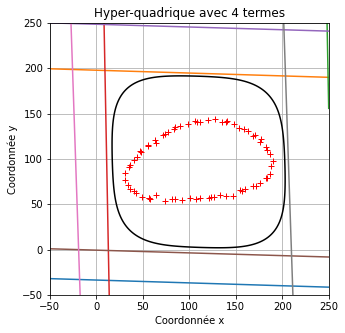

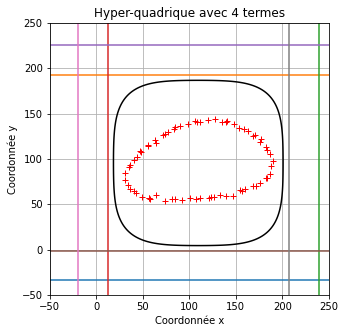

In [71]:
eps=10**(-6)
nmax=300
smax=160
smin=90
L_M (smax,smin,x1,y1,lambda0,eps, nmax)

Le but de la phase 3 à etait de determiner les parametres qui aller me donner la meilleur hyperquadrique qui englobe mon nuage de points.
On a fait sela en minimisant une fonction de cout qui etait un critére de distance entre chaque point de mon nuage avec un point de mon hyperqadrique.
On appliquer l'algorithme de  Levenberg-Marquart  afin de minimiser notre fonction cout.
Remarque sur l'application de la méthode : 
On choisit smin et smax selon notre nuage de points comme  mentionner dans le document phase 3.
On a fais plusieurs essayes et on a constater que:
- Plus notre beta est grand plus il agit comme la methode de gradient et plus il est petit plus il se comporte comme celui de newton. cest ne constante à deux facteurs.
- Quand beta est grand notre algorithme converge longtement.
- Quand beta est petit notre algorithme converge rapidement mais il faut bien choisir notre point de depart.
- L'implementation est asser complexe.
